# Perkenalan
Nama : Arvin Melvillo \
Batch : FTDS - RMT - 020 \
Dataset : Churn Dataset \
Latar belakang : Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan. \
Objective : Memprediksi apakah customer akan berhenti memakai produk tersebut atau tidak \
Pengerjaan : Pada kasus ini, data scientist akan memprediksi dengan menggunakan model Artificial Neural Network. Model ANN yang dipakai menggunakan Sequential API dan juga Functional API. Nanti kedua model tersebut akan dievaluasi berdasarkan metric recall, karena perusahaan ingin memfollow up seluruh customer yang benar benar berhenti berlangganan. Sehingga pendekatan yang paling tepat adalah dengan melihat metric recall yang dimana customer tersebut terprediksi churn dengan benar oleh model

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Library for split, standardrize, and encode the dataset
from sklearn.model_selection import train_test_split #Split
from sklearn.preprocessing import MinMaxScaler #Scale
from sklearn.preprocessing import OrdinalEncoder #Encode

# For handle outlier
from feature_engine.outliers import Winsorizer

# For Feature Selection
from scipy.stats import ttest_ind, chisquare

# For Undersampling
from imblearn.under_sampling import RandomUnderSampler

# For Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras import Model

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, recall_score

# Data Loading

In [2]:
data = pd.read_csv("deployment/churn.csv")

In [3]:
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
data.duplicated().sum() # Melihat data total data duplikat

18

In [5]:
data = data.drop_duplicates() # Menghapus data duplikat

In [6]:
data_copy = data.copy()

In [7]:
data.head(10) # Memanggil 10 data pertama

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [8]:
data.tail(10) # Memanggil 10 data terakhir

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


# Explarotary Data Analysis

Sebelum memulai analisa data, mari lihat total data, tipe - tipe data, dan missing value pada data ini.

In [9]:
data.shape

(36992, 22)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  avg_tr

## Check Cardinality

In [11]:
data.select_dtypes(include=['object']).nunique()

user_id                         36992
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
dtype: int64

Dari hasil data category diatas, dapat dikatakan bahwa high cardinality terdapat pada **user_id**, **joining_date** dan **last_visit_time**. Menurut opini pribadi, ketiga data tersebut tidak ada hubungannya dengan alasan seseorang dapat menjadi churn. Oleh karena itu ketiga data ini dapat di drop nantinya

## Check Missing Values

In [12]:
data.isnull().sum().sort_values(ascending=False).head(10) / len(data) * 100

joined_through_referral     14.700476
region_category             14.673443
medium_of_operation         14.578828
preferred_offer_types        0.778547
gender                       0.159494
user_id                      0.000000
avg_frequency_login_days     0.000000
feedback                     0.000000
complaint_status             0.000000
past_complaint               0.000000
dtype: float64

Dari hasil pengecekan missing value, data **joined_through_referral**, **region_category**, dan **medium_of_operation** memiliki missing value diatas 10% dari data keseluruhan. Sehingga apabila data tersebut di handle missing value dengan imputasi, maka kebanyakan data akan menjadi **bias**. **Bias** dari data pada kasus ini dapat membuat kita memprediksi customer yang churn menjadi customer yang tidak churn dan mungkin dapat membuat kita memperlakukan customer churn tersebut seperti customer yang tidak churn. Alhasil kita dapat kehilangan customer - customer yang churn tapi tidak terprediksi churn. Untuk menghindari hal tersebut ketiga data tersebut akan di drop atau tidak digunakan untuk modelling

In [13]:
col_miss = ['preferred_offer_types','gender']
for col in col_miss:
  print(f'{col} values:',data[col].unique())

preferred_offer_types values: ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]
gender values: ['F' 'M' nan]


Mari lakukan pengecekan terhadap kedua data missing yang ingin di handle yaitu data **gender** dan **preferred_offer_types**. Dimana pada data numeric akan diuji dengan **t-test** dan pada data categorical diuji dengan **chi square test**

In [14]:
num_col = data.select_dtypes(include=np.number).columns[data.select_dtypes(include=np.number).notnull().all()].tolist()
for i in num_col:
  if i != 'churn_risk_score':
    t_stat, p_val = ttest_ind(data[data['preferred_offer_types'].isnull()][i],data[data['preferred_offer_types'].notnull()][i])
    if p_val < 0.05:
      print(f'{i} and preferred_offer_types p-value:',p_val)
    t_stat, p_val = ttest_ind(data[data['gender'].isnull()][i],data[data['gender'].notnull()][i])
    if p_val < 0.05:
      print(f'{i} and gender p-value:',p_val)

Dari hasil uji statistik t-test data **gender** dengan data **numeric** dan data **preferred_offer_types** dengan data **numeric**, tidak ada pola untuk missing value dari data tersebut

In [15]:
cat_col = data.select_dtypes(include=['object']).columns[data.select_dtypes(include=['object']).notnull().all()].tolist()
cat_col = np.concatenate((cat_col,col_miss,['churn_risk_score']), axis=0)
cat_col = np.delete(cat_col, [0,2,4]) # 0 -> user_id, 2 -> joining_date, 4 -> last_visit_time
cat_col

array(['membership_category', 'internet_option', 'used_special_discount',
       'offer_application_preference', 'past_complaint',
       'complaint_status', 'feedback', 'preferred_offer_types', 'gender',
       'churn_risk_score'], dtype='<U28')

In [16]:
data_cat = data[cat_col].copy()

Dikarenakan data missing pada data **gender** dan **preferred_offer_types** sangat sedikit, maka sebaiknya dilakukan under sampling sebelum melakukan chi square test pada kedua data tersebut

In [17]:
rus = RandomUnderSampler(random_state=0)
undersample_preferred_offer_types, preferred_offer_types_missing = rus.fit_resample(data, data['preferred_offer_types'].isnull())
undersample_gender, gender_missing = rus.fit_resample(data, data['preferred_offer_types'].isnull())

In [18]:
for i in cat_col:
  if i != 'preferred_offer_types':
    t_stat, p_val = chisquare(pd.crosstab(undersample_preferred_offer_types[i], undersample_preferred_offer_types['preferred_offer_types'].isnull()), axis=None)
    if p_val < 0.05:
      print(f'{i} and preferred_offer_types p_values:', p_val)
  if i != 'gender':
    t_stat, p_val = chisquare(pd.crosstab(undersample_gender[i], undersample_gender['gender'].isnull()), axis=None)
    if p_val < 0.05:
      print(f'{i} and gender p_values:', p_val)

membership_category and preferred_offer_types p_values: 1.6468319796658266e-05
membership_category and gender p_values: 1.7669014517575396e-130
internet_option and gender p_values: 4.130287201748911e-121
used_special_discount and gender p_values: 2.507357009711368e-125
offer_application_preference and preferred_offer_types p_values: 0.040606517314869785
offer_application_preference and gender p_values: 1.7501664018404834e-126
past_complaint and gender p_values: 6.119289707107008e-123
complaint_status and preferred_offer_types p_values: 1.4857974258918587e-71
complaint_status and gender p_values: 1.7595538960386475e-267
feedback and preferred_offer_types p_values: 2.025105560667174e-36
feedback and gender p_values: 2.091326196809923e-199
preferred_offer_types and gender p_values: 2.790638218128974e-60
churn_risk_score and preferred_offer_types p_values: 0.04806431491168555
churn_risk_score and gender p_values: 7.050939237069544e-126


Dari hasil uji statistik data missing pada **gender** dengan data **categorical** dan data missing pada **preferred_offer_types** dengan data **categorical**. Data missing di **gender** dan **preferred_offer_types** memiliki pola missing.\
 Dimana data **gender** memiliki pola missing pada **membership_category**, **internet_option**, **used_special_discount**, **offer_application_preference**, **past_complain**, **complaint_status**, **feedback** dan **churn_risk_score**, sedangkan data **preferred_offer_types** memiliki pola missing pada **membership_category**, **complaint_status**, dan **feedback**. Mari kita lihat polanya

In [19]:
data[data['gender'].isnull()].groupby(['complaint_status','feedback','used_special_discount','offer_application_preference','membership_category',
                                       'past_complaint','churn_risk_score','internet_option'])['user_id'].count()

complaint_status          feedback                  used_special_discount  offer_application_preference  membership_category  past_complaint  churn_risk_score  internet_option
No Information Available  No reason specified       No                     Yes                           Basic Membership     Yes             1                 Mobile_Data        1
                          Poor Customer Service     No                     Yes                           Basic Membership     Yes             1                 Wi-Fi              1
                                                                                                         Premium Membership   Yes             0                 Wi-Fi              1
                          Poor Product Quality      Yes                    No                            Basic Membership     Yes             1                 Mobile_Data        1
                          Products always in Stock  No                     Yes                      

Pada data **gender**, diperhatikan bahwa data missingnya memiliki pola namun pola tersebut tidak terlihat sehingga dapat dikatakan sebagai Missing Value jenis **MAR**.

In [20]:
data[data['preferred_offer_types'].isnull()].groupby(['complaint_status', 'feedback', 'membership_category'])['user_id'].count()

complaint_status          feedback                  membership_category
No Information Available  No reason specified       Basic Membership       1
                                                    Silver Membership      4
                          Poor Customer Service     No Membership          2
                                                    Silver Membership      2
                          Poor Product Quality      Basic Membership       4
                                                                          ..
Unsolved                  Products always in Stock  Premium Membership     1
                          Reasonable Price          Premium Membership     1
                          Too many ads              Gold Membership        2
                                                    Platinum Membership    2
                                                    Silver Membership      1
Name: user_id, Length: 113, dtype: int64

Pada data **preferred_offer_types**, diperhatikan bahwa data missingnya memiliki pola namun pola tersebut tidak terlihat sehingga dapat dikatakan sebagai Missing Value jenis **MAR**.

## Data Distribution Check

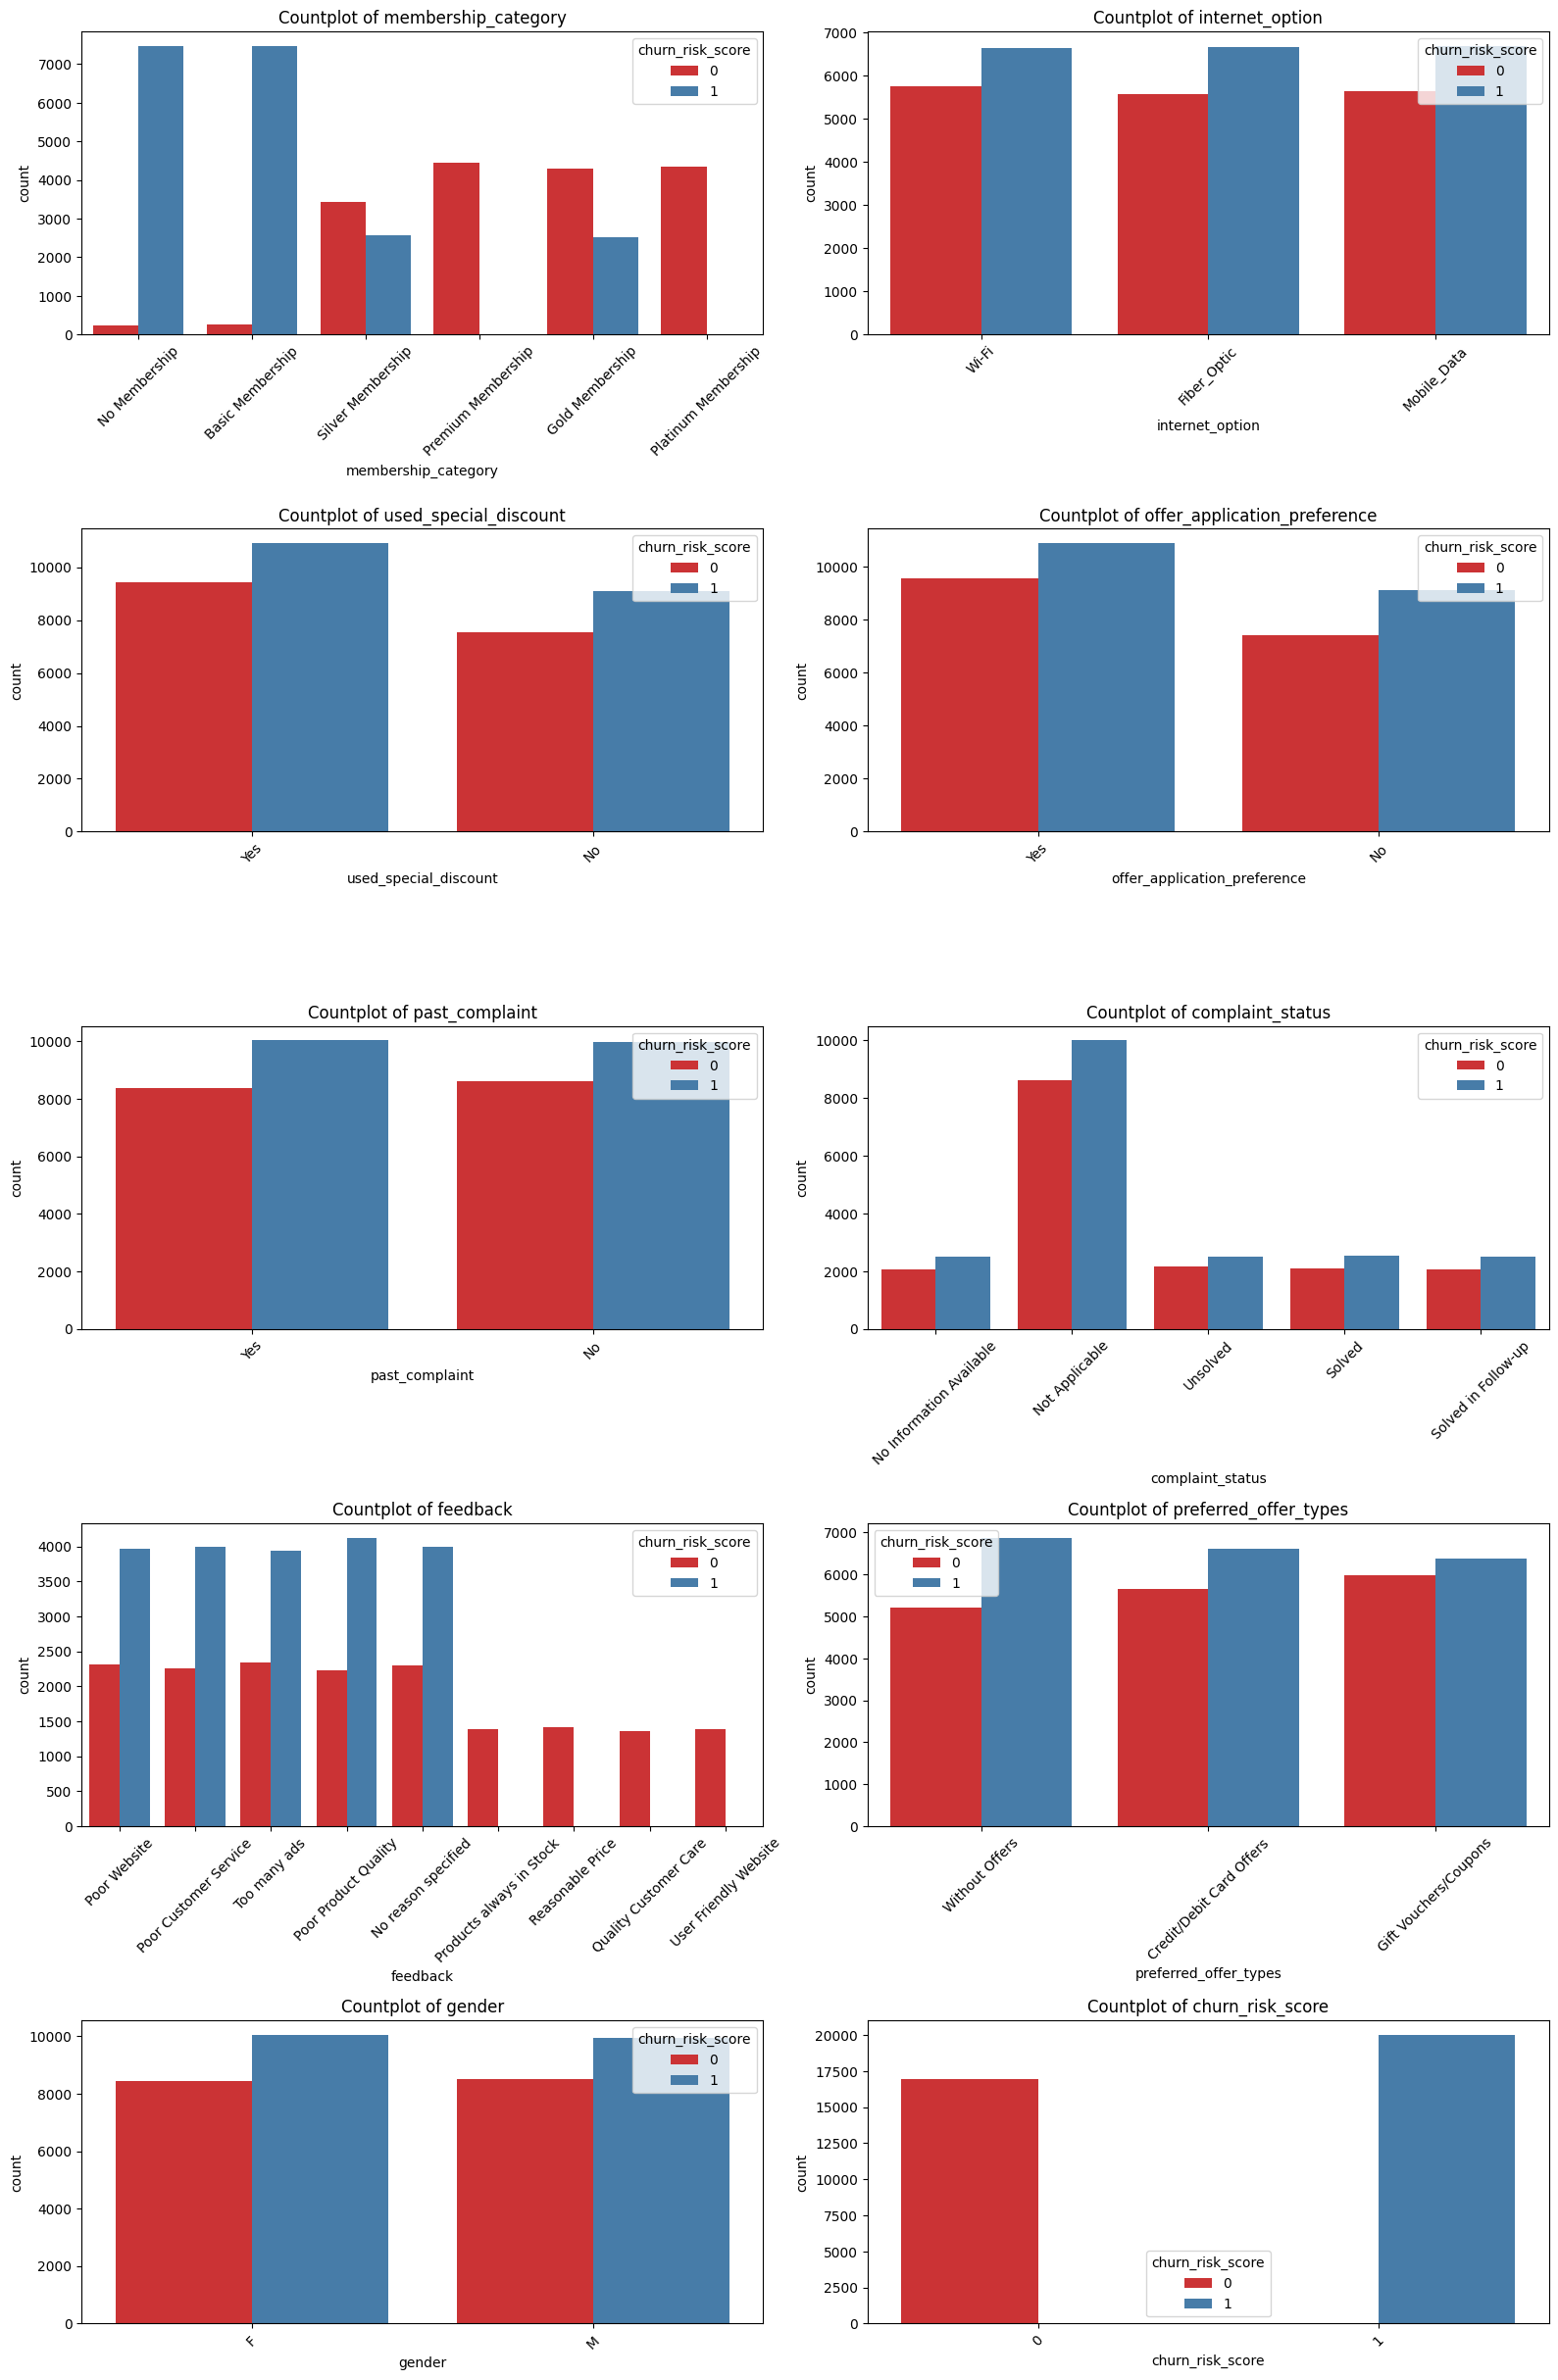

In [21]:
total_col = len(cat_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in cat_col:
    plt.subplot(total_col * 2, 2, i)
    sns.countplot(x = col, hue = 'churn_risk_score', palette = 'Set1', data = data)
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
    i += 1

plt.tight_layout()
plt.show()

Dari hasil analisa diatas, dapat dikatakan bahwa customer yang churn cenderung memiliki **feedback yang negatif** kepada perusahaan dan cenderung **tidak memiliki membership ataupun member basic** saja.

In [22]:
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'churn_risk_score']

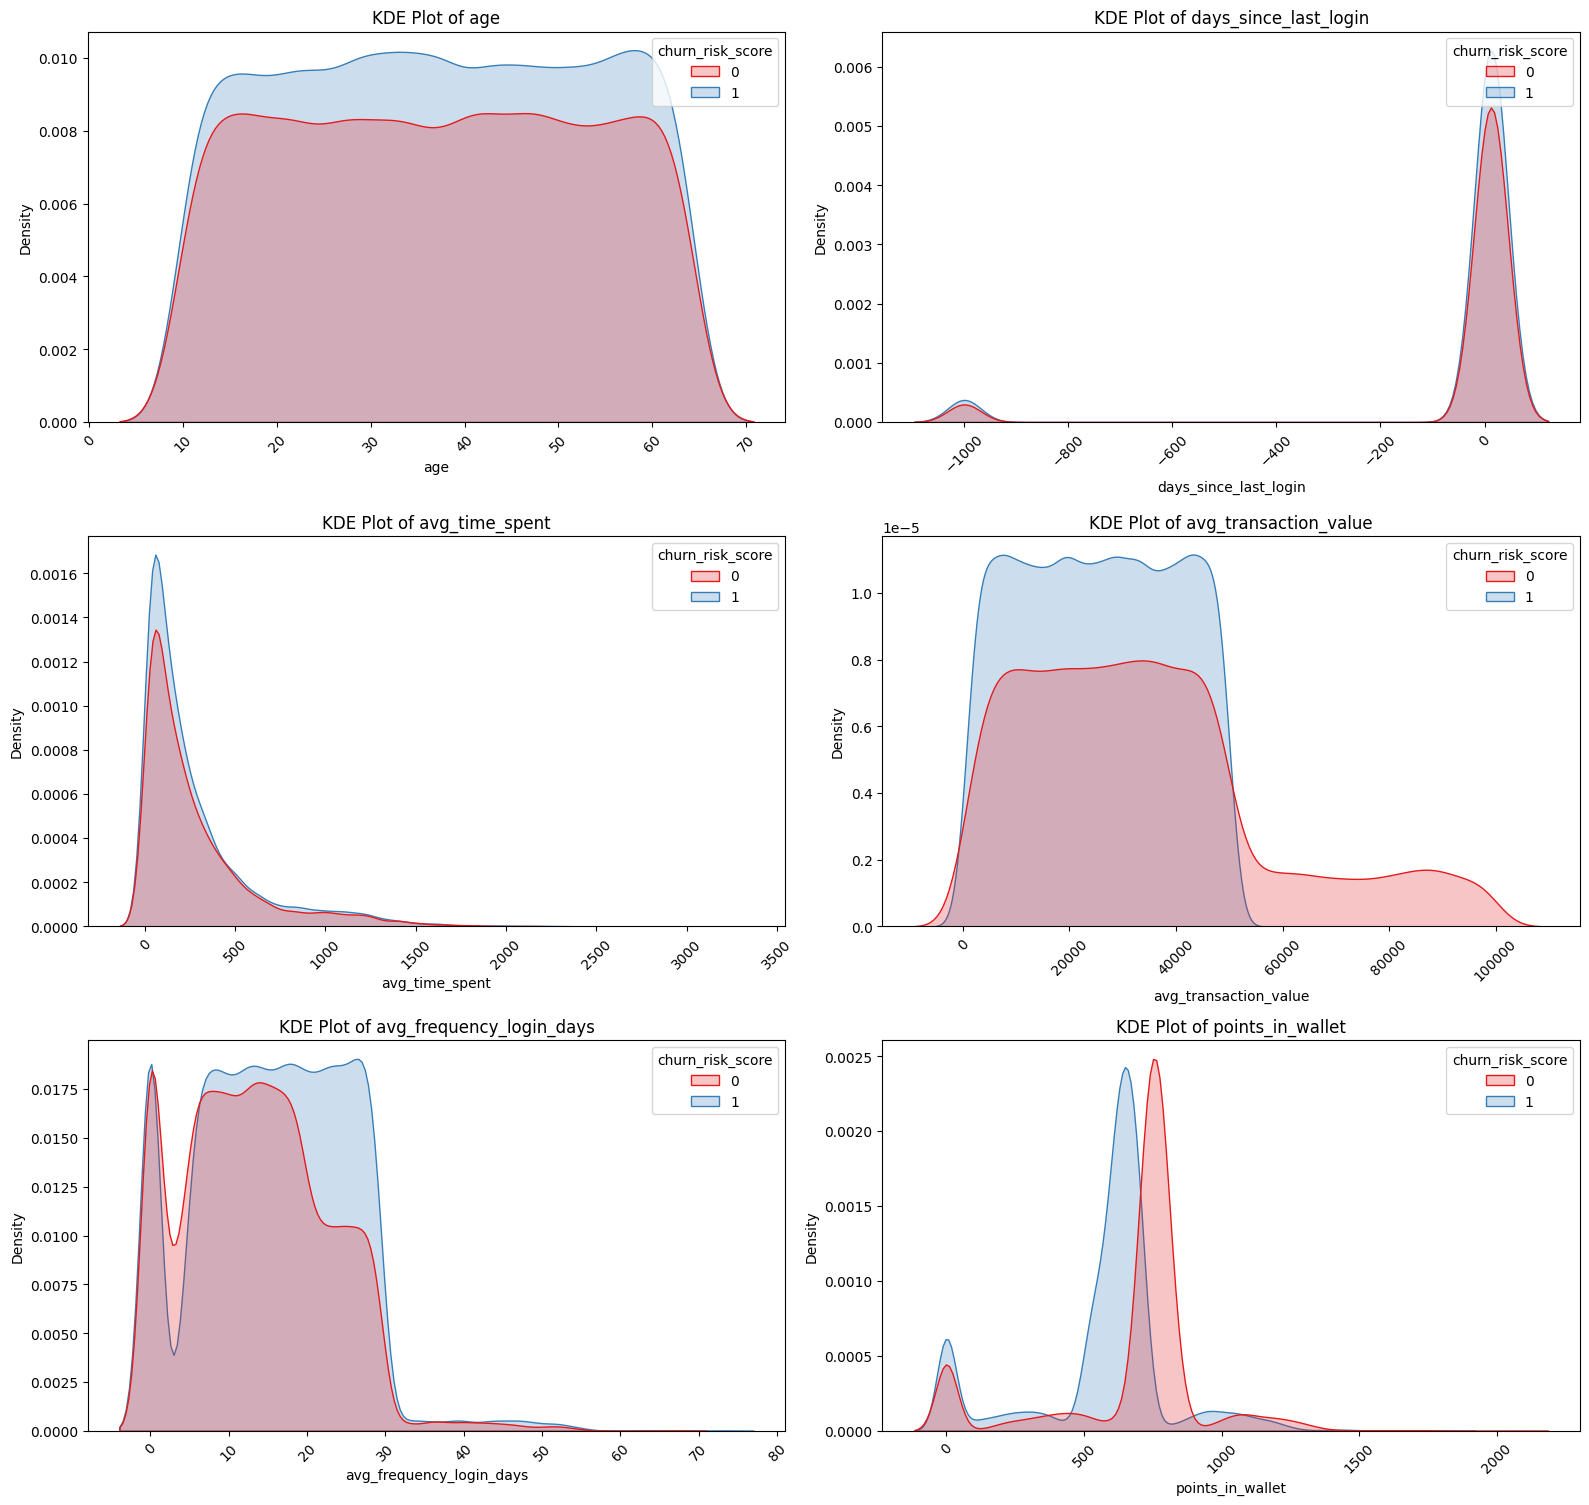

In [23]:
total_col = len(num_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col:
  if col != 'churn_risk_score':
    plt.subplot(total_col * 2, 2, i)
    sns.kdeplot(x = col, hue = 'churn_risk_score', palette = 'Set1', fill=True, data = data)
    plt.xticks(rotation=45)
    plt.title(f'KDE Plot of {col}')
    i += 1

plt.tight_layout()
plt.show()

Dari hasil analisa diatas, customer yang melakukan churn cenderung memiliki **rata - rata transaksi** yang **rendah** dibandingkan dengan customer yang tidak churn

<Axes: ylabel='user_id'>

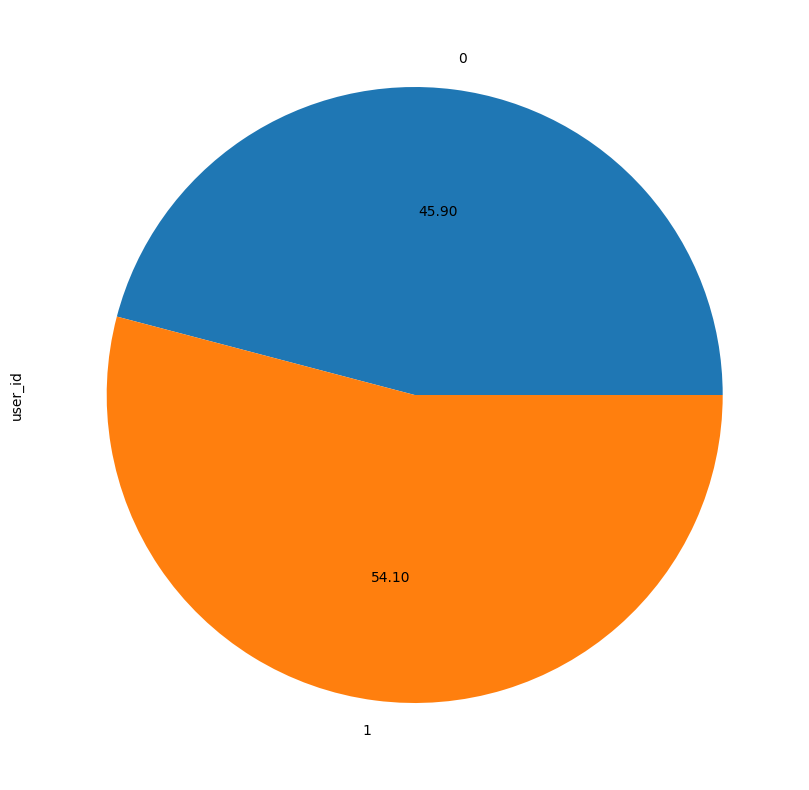

In [24]:
data.groupby('churn_risk_score')['user_id'].count().plot.pie(y='user_id', autopct='%0.2f', figsize=(10,10))

Distribusi pada data ini dapat dikatakan **balance** sehingga data tidak perlu dilakukan **oversample** ataupun **undersample**

## Outlier Check

Skewness of age: -0.007319319267324801
Skewness of days_since_last_login: -3.9413558217578144
Skewness of avg_time_spent: 2.2765487001579205
Skewness of avg_transaction_value: 1.0110271627457472
Skewness of avg_frequency_login_days: 0.38986070002523915
Skewness of points_in_wallet: -0.7734917908458531


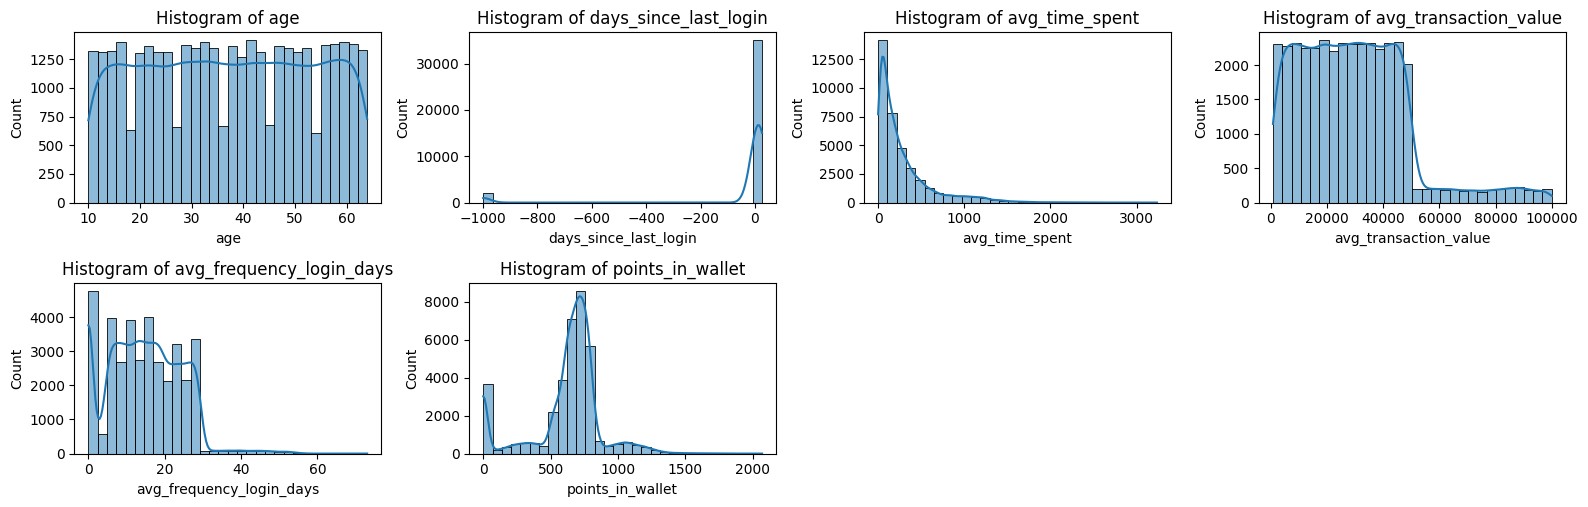

In [25]:
total_col = len(num_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col:
  if col != 'churn_risk_score':
    plt.subplot(total_col * 4, 4, i)
    sns.histplot(data[col], kde=True, bins = 30)
    plt.title(f'Histogram of {col}')
    print(f'Skewness of {col}:',data[col].skew())
    i += 1

plt.tight_layout()
plt.show()

Dari Visualisasi diatas dapat disimpulkan bahwa distribusi dibagi data menjadi 3 yaitu:
- Data **age** memiliki pemusatan data yang sudah terpusah ke tengah.
- Data **avg_time_spent**, **avg_transaction_value**, **avg_frequency_login_days** dan **points_in_wallet** memiliki distribusi data yang cenderung condong ke kiri.
- Data **days_since_login** memiliki pemusatan data yang condong ke sebelah kanan

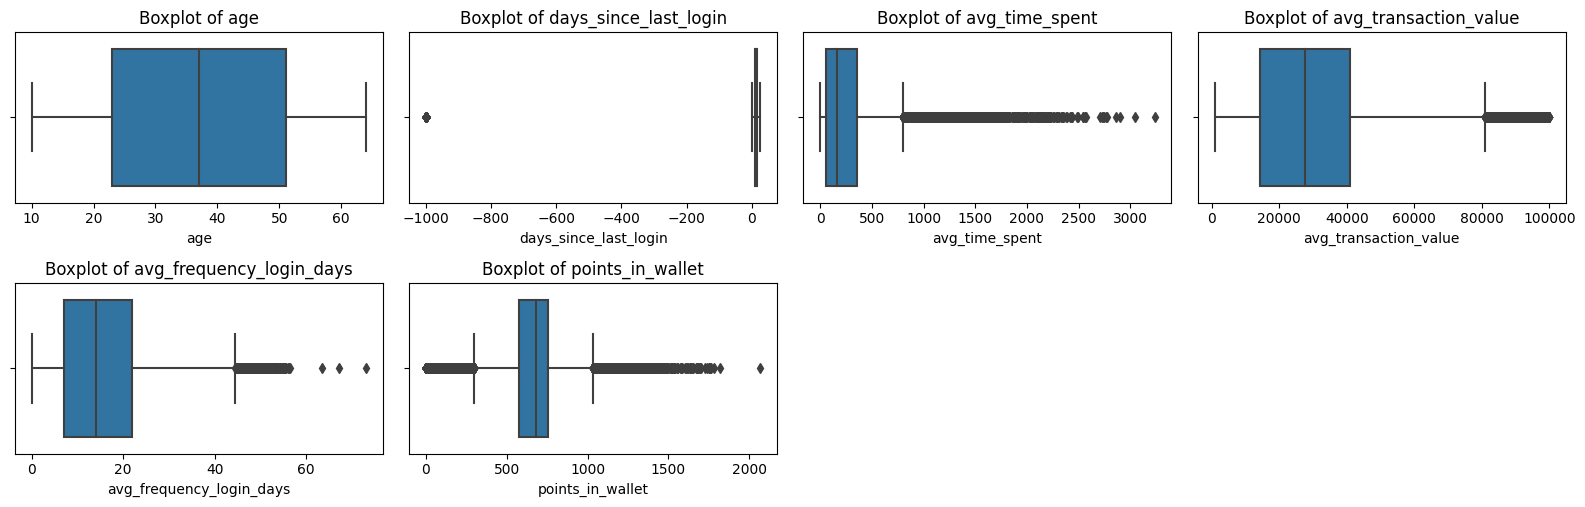

In [26]:
total_col = len(num_col)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col:
  if col != 'churn_risk_score':
    plt.subplot(total_col * 4, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    i += 1

plt.tight_layout()
plt.show()

Dari hasil visualisasi boxplot, data **age** tidak memiliki outlier, namun data - data lainnya memiliki outlier yang cukup banyak seperti:
- Data **days_since_login** memiliki outlier pada data bagian kiri dengan nilai cukup ekstrim
- Data **avg_time_spent** memiliki outlier pada data bagian kanan dengan nilai cukup ekstrim
- Data **avg_transaction_value** dan **avg_frequency_login_days** memiliki outlier pada bagian kanan
- Data **point_in_wallet** memiliki outlier di kedua sisi bagian data

## Correlation and Statistic Test

In [27]:
p_val_num = {}
col_num_used = []
for col in num_col:
  if col != 'churn_risk_score':
    t_stat, p_val = ttest_ind(data[data['churn_risk_score'] == 0][col],data[data['churn_risk_score'] == 1][col])
    if p_val < 0.05:
      print(f'{col} and churn_risk_score p-value:',p_val)
      col_num_used.append(col)
    p_val_num[f'{col}'] = p_val

avg_time_spent and churn_risk_score p-value: 0.010854898119181668
avg_transaction_value and churn_risk_score p-value: 0.0
avg_frequency_login_days and churn_risk_score p-value: 2.342701458947469e-106
points_in_wallet and churn_risk_score p-value: 0.0


In [28]:
#Melihat hasil column yang akan digunakan untuk predict customer churn
col_num_used

['avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

<Axes: >

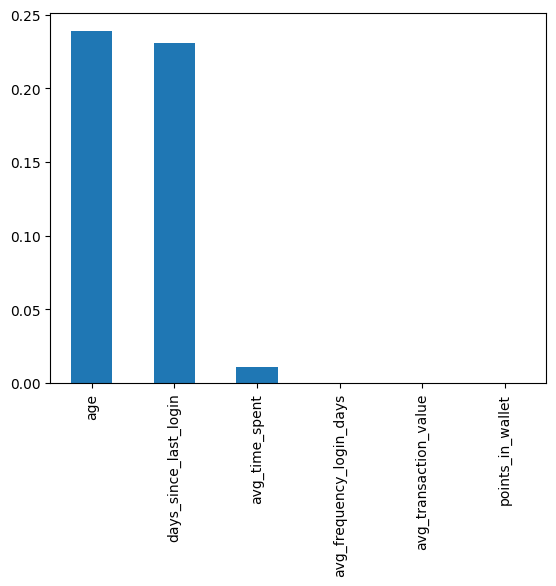

In [29]:
pd.Series(p_val_num).sort_values(ascending=False).plot.bar()

Dari hasil visualisasi dan uji statistik t-test diatas, dapat dikatakan bahwa data yang memiliki hubungan signifikan dengan data **churn_risk_score** ialah **avg_time_spent**, **avg_frequency_login_days**, **avg_transaction_value**, dan **point_in_wallet**

In [30]:
p_val_cat = {}
col_cat_used = []
for col in cat_col:
  #Karena yang dibandingkan adalah value dari churn_risk_score maka masukkan kondisi untuk exclude churn_risk_score dari pengecekan
  if col != 'churn_risk_score':
    t_stat, p_val = chisquare(pd.crosstab(data[col], data['churn_risk_score']), axis=None)
    if p_val < 0.05:
      print(f'{col} and churn_risk_score p-value:',p_val)
      col_cat_used.append(col)
    p_val_cat[f'{col}'] = p_val

membership_category and churn_risk_score p-value: 0.0
internet_option and churn_risk_score p-value: 2.2941888810065228e-52
used_special_discount and churn_risk_score p-value: 1.87751706047951e-133
offer_application_preference and churn_risk_score p-value: 6.572910532239486e-143
past_complaint and churn_risk_score p-value: 2.019853154366839e-54
complaint_status and churn_risk_score p-value: 0.0
feedback and churn_risk_score p-value: 0.0
preferred_offer_types and churn_risk_score p-value: 1.8698776064780424e-66
gender and churn_risk_score p-value: 6.409524055217387e-54


In [31]:
# Melihat column categorical yang akan digunakan untuk predict
col_cat_used

['membership_category',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'preferred_offer_types',
 'gender']

<Axes: >

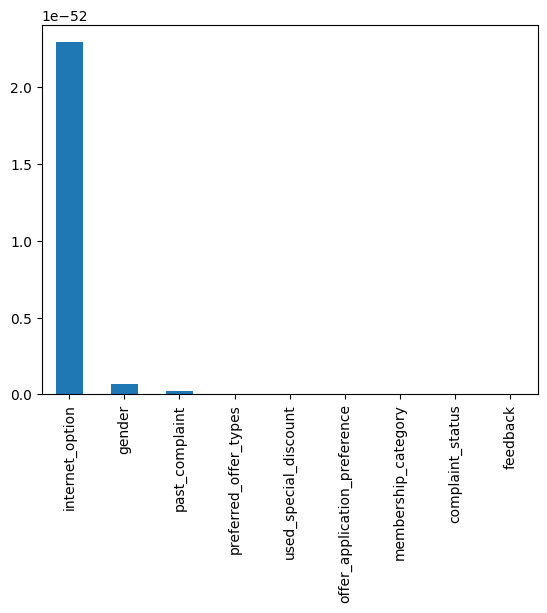

In [32]:
pd.Series(p_val_cat).sort_values(ascending=False).plot.bar()

Dari hasil visualisasi dan uji statistik chi-square diatas, dapat dikatakan bahwa seluruh data categorical memiliki hubungan signifikan dengan data **churn_risk_score**

# Feature Engineering

## Split Data to Training Data, Validation Data, and Test Data

In [33]:
# Splitting between `X` and `y`

X = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

In [34]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=20) # 80% train data 20% test data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=20) #get 12,5% data train to validation data (10% of all data) and 67,5% data train (70% of all data)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (25893, 21)
Val Size :  (3700, 21)
Test Size :  (7399, 21)


## Handling Missing Values

Sesuai dengan analisa diatas, ditemukan missing value pada 5 data, yang dimana 5 data tersebut akan dihandle secara berikut:
- **joined_through_referral** memiliki missing value sebesar **14.7004 %**, dikarenakan missing value sudah terlalu banyak pada data ini maka data ini akan kita drop, supaya tidak muncul bias dari imputasi dan tidak kehilangan banyak data ketika yang dihapus adalah data missing dari kolom ini.
- **region_category** memiliki missing value sebesar **14.67 %**, dikarenakan missing value sudah terlalu banyak pada data ini maka data ini akan kita drop, supaya tidak muncul bias dari imputasi dan tidak kehilangan banyak data ketika yang dihapus adalah data missing dari kolom ini.
- **medium_of_operation** memiliki missing value sebesar **14.57 %**, dikarenakan missing value sudah terlalu banyak pada data ini maka data ini akan kita drop, supaya tidak muncul bias dari imputasi dan tidak kehilangan banyak data ketika yang dihapus adalah data missing dari kolom ini.
- **preferred_offer_types** memiliki missing value sebesar **0.77 %**, dan berdasarkan hasil uji statistik, data missing memiliki pola namun tidak terlihat polanya sehingga data missing ini dikatakan sebagai **MAR**. Dan karena data **preferred_offer_types** berbentuk category, maka data **preferred_offer_types** akan diimputasi dengan modus dari **preferred_offer_types**
- **gender** memiliki missing value sebesar **0.15 %**, dan berdasarkan hasil uji statistik, data missing memiliki pola namun tidak terlihat polanya sehingga data missing ini dikatakan sebagai **MAR**. Dan karena data **gender** berbentuk category, maka data **gender** akan diimputasi dengan modus dari **gender**

Untuk drop data akan dilakukan pada pipeline model, dan untuk imputasi modus akan dilakukan pada bagian ini

In [35]:
# Imputasi NULL pada preferred_offer_types dengan modus dari preferred_offer_types pada data train
X_train['preferred_offer_types'].fillna(X_train['preferred_offer_types'].mode()[0], inplace=True)
X_val['preferred_offer_types'].fillna(X_train['preferred_offer_types'].mode()[0], inplace=True)
X_test['preferred_offer_types'].fillna(X_train['preferred_offer_types'].mode()[0], inplace=True)
# Imputasi NULL pada gender dengan modus dari gender pada data train
X_train['gender'].fillna(X_train['gender'].mode()[0], inplace=True)
X_val['gender'].fillna(X_train['gender'].mode()[0], inplace=True)
X_test['gender'].fillna(X_train['gender'].mode()[0], inplace=True)

Setelah imputasi mari lakukan pengecekan nilai NULL pada kedua column tersebut

In [36]:
X_train[['gender','preferred_offer_types']].isnull().sum()

gender                   0
preferred_offer_types    0
dtype: int64

In [37]:
X_val[['gender','preferred_offer_types']].isnull().sum()

gender                   0
preferred_offer_types    0
dtype: int64

In [38]:
X_test[['gender','preferred_offer_types']].isnull().sum()

gender                   0
preferred_offer_types    0
dtype: int64

Nilai NULL sudah teratasi dengan baik

## Handling Outlier

Berdasarkan analisa sebelumnya, masih banyak fitur yang memiliki outlier perlu di cek lagi seberapa banyak outlier yang ada pada data di setiap columnnya

In [39]:
#Fungsi untuk mendapatkan upper limit dan lower limit
def find_limit(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * distance)
    upper_limit  = df[variable].quantile(0.75) + (IQR * distance)

    return upper_limit, lower_limit

In [40]:
#Seluruh data numeric kecuali data churn_risk_score
outlier_check = ['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']
data_outlier_check = {}
for i in outlier_check:
        data_outlier_check[f'{i}_upper_limit'], data_outlier_check[f'{i}_lower_limit'] = find_limit(X_train, i, 1.5)

In [41]:
print('Full data:', X_train.shape)
for i in outlier_check:
    print(f'Data without {i} outlier:',
        X_train[(X_train[i] >= data_outlier_check[f'{i}_lower_limit']) & (X_train[i] <= data_outlier_check[f'{i}_upper_limit'])].shape)
    print(f'Percent outlier for {i}:',
        len(X_train[(X_train[i] < data_outlier_check[f'{i}_lower_limit']) | (X_train[i] > data_outlier_check[f'{i}_upper_limit'])]) / len(X_train) * 100)

Full data: (25893, 21)
Data without age outlier: (25893, 21)
Percent outlier for age: 0.0
Data without days_since_last_login outlier: (24493, 21)
Percent outlier for days_since_last_login: 5.406866720735334
Data without avg_time_spent outlier: (23728, 21)
Percent outlier for avg_time_spent: 8.361333178851426
Data without avg_transaction_value outlier: (25105, 21)
Percent outlier for avg_transaction_value: 3.0432935542424593
Data without avg_frequency_login_days outlier: (25713, 21)
Percent outlier for avg_frequency_login_days: 0.6951685783802573
Data without points_in_wallet outlier: (21188, 21)
Percent outlier for points_in_wallet: 18.170934229328388


Dari data diatas, data **age** tidak memiliki outlier, namun data **points_in_wallet** memiliki data outlier yang cukup banyak (18% outlier), walau begitu data **points_in_wallet** memiliki hubungan signifikan dengan data **churn_risk_score** dan sangat disayangkan apabila column tersebut di drop nantinya. Oleh karena itu untuk data - data outlier pada **point_in_wallet** akan dihandle dengan capping. Untuk data outlier lain yang memiliki hubungan signifikan dengan **churn_risk_score** akan dilakukan capping juga, untuk yang tidak memiliki hubungan signifikan (**days_since_login**) akan di drop datanya di pembuatan model pipeline

In [42]:
winsorizer = Winsorizer(capping_method='iqr', # gaussian for mean and std
                          tail='both', # cap both tails
                          fold=1.5,
                          variables=['avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'])

winsorizer.fit(X_train)
X_train = winsorizer.transform(X_train)
X_val = winsorizer.transform(X_val)
X_test = winsorizer.transform(X_test)

Skew of avg_time_spent: 1.1533647679424965


Skew of avg_transaction_value: 0.7572140928338246
Skew of avg_frequency_login_days: 0.2610377663316854
Skew of points_in_wallet: -0.34743708913967536


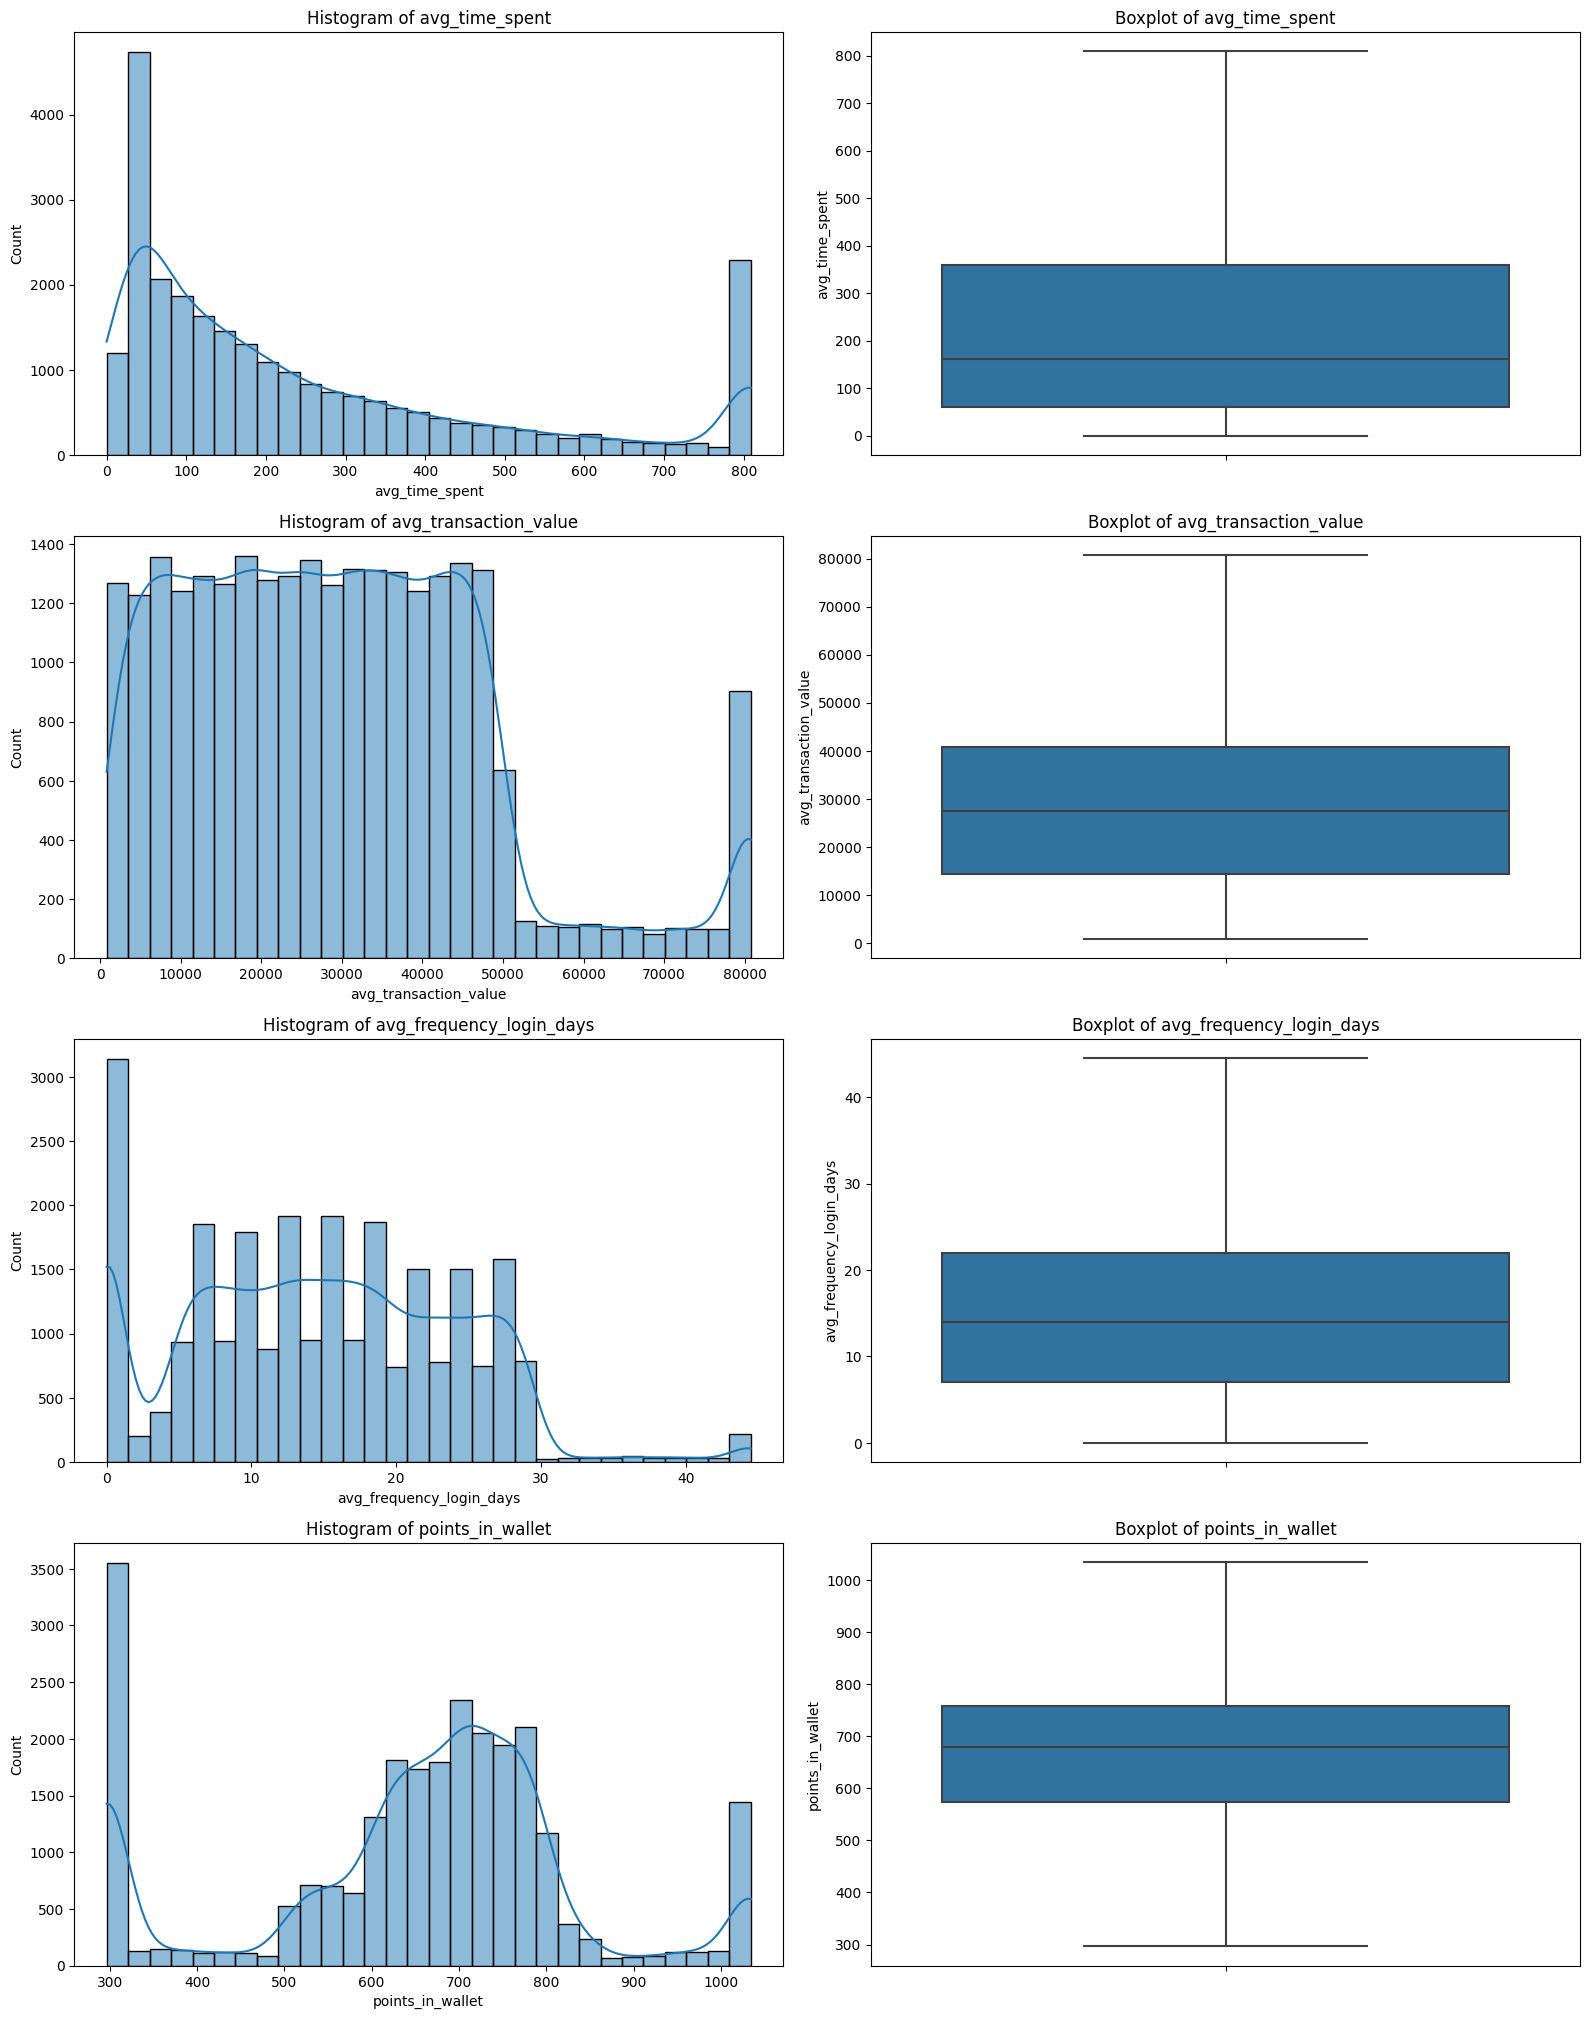

In [43]:
num_col_check = ['avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
total_col = len(num_col_check)
plt.figure(figsize=(16, total_col * 10))
i = 1
for col in num_col_check:
    plt.subplot(total_col * 2, 2, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    i += 1

    plt.subplot(total_col * 2, 2, i)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    print(f'Skew of {col}:',X_train[col].skew())
    i += 1

plt.tight_layout()
plt.show()

Dari hasil handle outlier, data dapat terlihat lebih terpusat dan outlier sudah lebih terbersihkan. Meskipun untuk data **avg_transaction_value** dan **avg_time_spent** masih memiliki distribusi data yang condong ke kiri.

## Make Pipeline for Features

Setelah melakukan splitting dan menghandle missing values dan outlier, mari buat pipeline untuk fitur - fitur yang akan digunakan oleh model. Pipeline ini nantinya akan dilakukan transformasi dimana ada scaling untuk data numerical dan encoding untuk data categorical

### Split Category and Numerical Columns

Melakukan splitting data berdasarkan tipe data khusus untuk data data yang digunakan sesuai dengan uji statistik yang dilakukan diatas

In [44]:
# Column numerical yang memiliki hubungan signifikan dari hasil uji ttest
num_cols = col_num_used
# Column categorical yang memiliki hubungan signifikan dari hasil uji chi square
cat_cols = col_cat_used

In [45]:
num_cols

['avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

In [46]:
cat_cols

['membership_category',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback',
 'preferred_offer_types',
 'gender']

In [47]:
X_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,37.023520,-41.953076,250.842176,29031.804271,14.634456,649.280789
std,15.901183,228.879933,242.890733,18526.781154,9.334789,188.109024
min,10.000000,-999.000000,0.000000,804.340000,0.000000,296.470000
25%,23.000000,8.000000,60.620000,14322.100000,7.000000,573.130000
50%,37.000000,12.000000,161.670000,27507.240000,14.000000,679.780000
75%,51.000000,16.000000,359.940000,40897.520000,22.000000,757.570000
max,64.000000,26.000000,808.920000,80760.650000,44.500000,1034.230000


Setelah melihat summary pada data X_train, dapat dilihat bahwa range data pada setiap columnya sangat beragam sehingga perlu dilakukan scaling. Selain itu, data category juga perlu di encode. Oleh karena itu mari buat pipeline khusus preprocess data (Scaling dan Encode)

### Feature Scaling

In [48]:
numeric_transformer = Pipeline(
    steps=[
        ("scaler", MinMaxScaler())
    ]
)

### Feature Encoding

In [49]:
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder()),
    ]
)

### Concat the preprocessor

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, np.array(num_cols)),
        ("cat", categorical_transformer, np.array(cat_cols))
    ],
    # Akan menghapus seluruh column yang tidak digunakan, dalam case ini fitur fitur yang tidak dimention cat_cols dan num_cols
    remainder='drop'
)

### Fit Feature

Setelah membuat column transformer atau pipeline data processing, maka baiknya melakukan processing kepada data data yang akan dimasukkan kedalam model

In [51]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)
X_train.shape

(25893, 13)

### Create Data Pipeline

Setelah data di transformasi, baiknya membuat tensorflow pipeline. Tujuannya agar jalur data dalam model menjadi lebih efisien dan efektif dalam sisi penggunaan resource.

In [52]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(10).batch(25)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(25)

# Model

In [53]:
# Untuk menyimpan hasil evaluasi model
all_report = {}

## Model Sequential

### Baseline Model

#### Model Definition

In [54]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [55]:
model_sequential = Sequential()
model_sequential.add(Dense(32,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(13,))) # Hidden Layer 1
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy', 'Recall'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model Training

In [56]:
# Train the Model

history_seq = model_sequential.fit(train_pipe,
                                   epochs=20,
                                   validation_data=val_pipe)

Epoch 1/20


1036/1036 [==============================] - 2s 1ms/step - loss: 0.5703 - accuracy: 0.7033 - recall: 0.7092 - val_loss: 0.5339 - val_accuracy: 0.7254 - val_recall: 0.7228
Epoch 2/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.5046 - accuracy: 0.7466 - recall: 0.7546 - val_loss: 0.4864 - val_accuracy: 0.7641 - val_recall: 0.7545
Epoch 3/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4523 - accuracy: 0.7869 - recall: 0.8101 - val_loss: 0.4244 - val_accuracy: 0.8057 - val_recall: 0.8448
Epoch 4/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.3955 - accuracy: 0.8222 - recall: 0.8609 - val_loss: 0.3706 - val_accuracy: 0.8341 - val_recall: 0.8936
Epoch 5/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.3517 - accuracy: 0.8392 - recall: 0.8690 - val_loss: 0.3407 - val_accuracy: 0.8457 - val_recall: 0.8569
Epoch 6/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.3247 - accuracy: 0.8512

#### Model Evaluation

In [57]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.570318,0.703279,0.709242,0.533902,0.725405,0.722782
1,0.504615,0.746572,0.754556,0.486391,0.764054,0.754536
2,0.452346,0.786931,0.810092,0.424381,0.805676,0.844758
3,0.395470,0.822153,0.860911,0.370607,0.834054,0.893649
4,0.351710,0.839223,0.868987,0.340749,0.845676,0.856855
5,0.324744,0.851195,0.845829,0.317690,0.848108,0.836190
6,0.308450,0.854632,0.842041,0.308275,0.847568,0.842238
7,0.298238,0.855830,0.838682,0.299072,0.846216,0.833669
8,0.291773,0.858224,0.839254,0.292501,0.848378,0.825605
9,0.287022,0.858804,0.840254,0.288300,0.851081,0.835685


<Axes: >

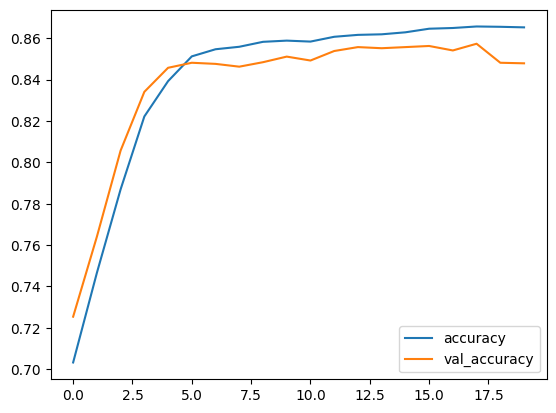

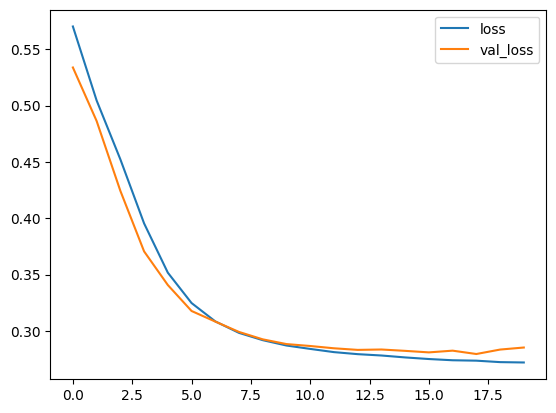

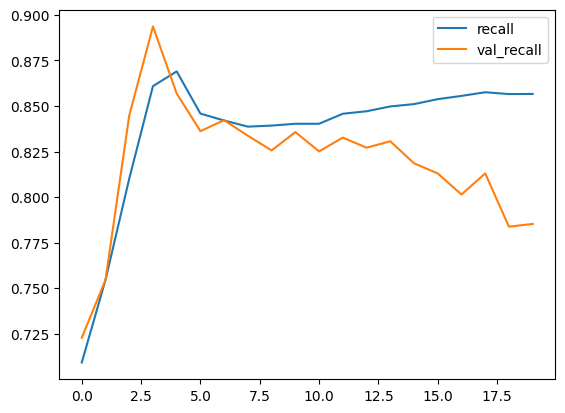

In [58]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()
history_seq_df[['recall', 'val_recall']].plot()

232/232 [==============================] - 0s 729us/step
Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      3362
           1       0.92      0.81      0.86      4037

    accuracy                           0.86      7399
   macro avg       0.86      0.86      0.86      7399
weighted avg       0.86      0.86      0.86      7399

Confusion Matrix      : 


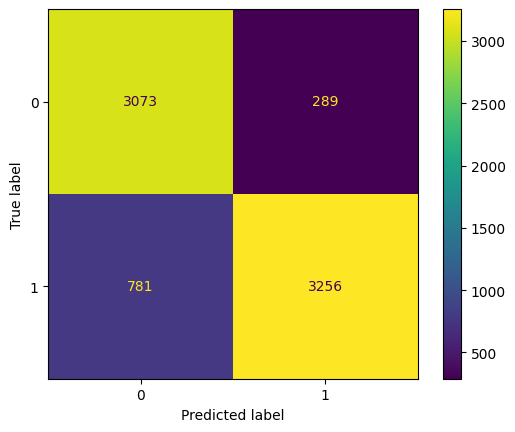

In [59]:
# Evaluate Test-Set

y_pred_func = model_sequential.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print('Classification report : \n',classification_report(y_test, y_pred_func))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_func)).plot())
score_reports = {
    'Accuracy - Test': accuracy_score(y_test, y_pred_func) * 100,
    'Recall for Not Churn - Test': recall_score(y_test, y_pred_func, pos_label=0) * 100,
    'Recall for Churn - Test': recall_score(y_test, y_pred_func, pos_label=1) * 100,
    'Average of Recall - Test': (recall_score(y_test, y_pred_func, pos_label=0) * 100 + recall_score(y_test, y_pred_func, pos_label=1) * 100)/len(y_train.unique()),
}
all_report['Sequential (Baseline)'] = score_reports

Dari hasil analisa model diatas, model sudah goodfit dalam metric loss dan accuracy. Namun model jika dilihat dari metrics recall, model dapat dikatakan overfit karena recall dari data validation mengalami penurunan namun recall pada data train mengalami peningkatan. Oleh karena itu butuh melakukan improvement dengan mengurangi jumlah neuron dan mengurangi hidden layer pada model

### Model Improvement

#### Model Definition

In [60]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [61]:
model_sequential_improve = Sequential()
model_sequential_improve.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(13,))) # Hidden Layer 1
model_sequential_improve.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential_improve.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential_improve.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy', 'Recall'])
model_sequential_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model Training

In [62]:
# Train the Model

history_seq = model_sequential_improve.fit(train_pipe,
                                   epochs=20,
                                   validation_data=val_pipe)

Epoch 1/20


1036/1036 [==============================] - 2s 1ms/step - loss: 0.5774 - accuracy: 0.6936 - recall: 0.7073 - val_loss: 0.5400 - val_accuracy: 0.7259 - val_recall: 0.7132
Epoch 2/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.5211 - accuracy: 0.7387 - recall: 0.7294 - val_loss: 0.5095 - val_accuracy: 0.7516 - val_recall: 0.7233
Epoch 3/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4965 - accuracy: 0.7575 - recall: 0.7488 - val_loss: 0.4951 - val_accuracy: 0.7597 - val_recall: 0.7480
Epoch 4/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4830 - accuracy: 0.7656 - recall: 0.7633 - val_loss: 0.4823 - val_accuracy: 0.7684 - val_recall: 0.7601
Epoch 5/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4649 - accuracy: 0.7828 - recall: 0.7853 - val_loss: 0.4548 - val_accuracy: 0.8003 - val_recall: 0.7838
Epoch 6/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4308 - accuracy: 0.8120

#### Model Evaluation

In [63]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.577386,0.693585,0.707312,0.540004,0.725946,0.713206
1,0.521108,0.738655,0.729397,0.509458,0.751622,0.723286
2,0.496510,0.757463,0.748767,0.495100,0.759730,0.747984
3,0.482990,0.765612,0.763348,0.482337,0.768378,0.760081
4,0.464883,0.782798,0.785291,0.454758,0.800270,0.783770
5,0.430840,0.811957,0.813237,0.418889,0.825676,0.806956
6,0.396200,0.833893,0.831034,0.390616,0.837297,0.806956
7,0.369304,0.845441,0.841327,0.365867,0.846216,0.819052
8,0.348254,0.852624,0.846973,0.347042,0.850270,0.819556
9,0.332258,0.858186,0.853835,0.332474,0.853784,0.822077


<Axes: >

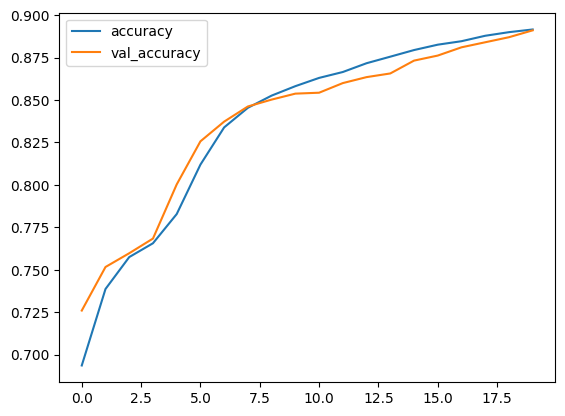

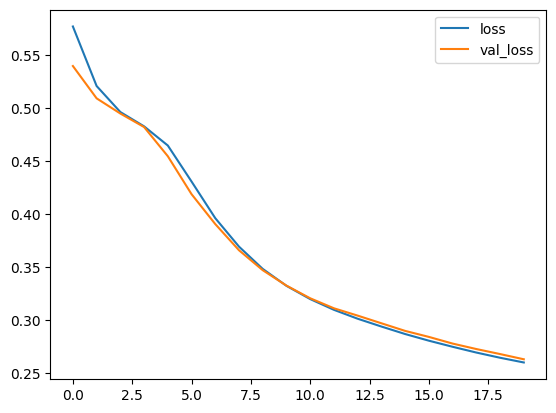

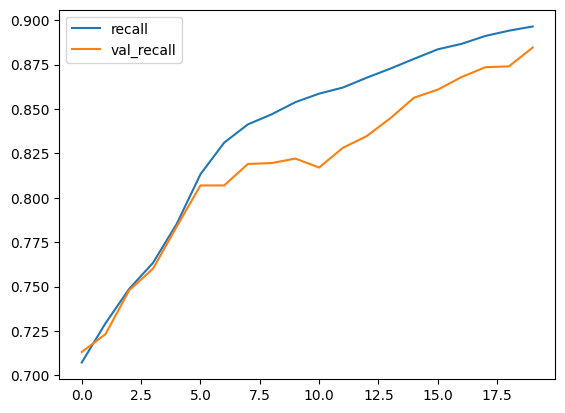

In [64]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()
history_seq_df[['recall', 'val_recall']].plot()

232/232 [==============================] - 0s 777us/step
Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      3362
           1       0.91      0.90      0.91      4037

    accuracy                           0.90      7399
   macro avg       0.90      0.90      0.90      7399
weighted avg       0.90      0.90      0.90      7399

Confusion Matrix      : 


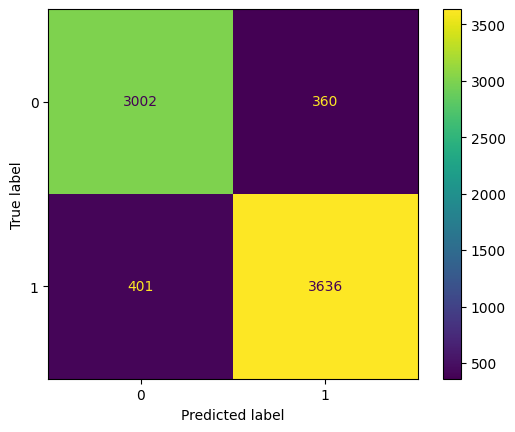

In [65]:
# Evaluate Test-Set

y_pred_func = model_sequential_improve.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print('Classification report : \n',classification_report(y_test, y_pred_func))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_func)).plot())
score_reports = {
    'Accuracy - Test': accuracy_score(y_test, y_pred_func) * 100,
    'Recall for Not Churn - Test': recall_score(y_test, y_pred_func, pos_label=0) * 100,
    'Recall for Churn - Test': recall_score(y_test, y_pred_func, pos_label=1) * 100,
    'Average of Recall - Test': (recall_score(y_test, y_pred_func, pos_label=0) * 100 + recall_score(y_test, y_pred_func, pos_label=1) * 100)/len(y_train.unique()),
}
all_report['Sequential (Tuned)'] = score_reports

In [66]:
pd.DataFrame(all_report)[['Sequential (Baseline)','Sequential (Tuned)']].T

,Accuracy - Test,Recall for Not Churn - Test,Recall for Churn - Test,Average of Recall - Test
Sequential (Baseline),85.538586,91.403926,80.653951,86.028939
Sequential (Tuned),89.714826,89.292088,90.066881,89.679485


Dari hasil improvement model Sequential, model berhasil mengalami peningkatan rata-rata recall dari **86,02%** menjadi **89,67%**. Sehingga dapat dikatakan model berhasil ditingkatkan

## Model Functional

### Baseline Model

#### Model Definition

In [67]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [68]:
input_layer = Input(shape=(13,))
hidden_layer_1 = Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
hidden_layer_3 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_2)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy','Recall'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 13)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 32)                   448       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 16)                   528       ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 8)                    136       ['dense_1[0][0]']             
                                                                                              

#### Model Training

In [69]:
# Train the Model

history_func = model_functional.fit(train_pipe,
                                   epochs=20,
                                   validation_data=val_pipe)

Epoch 1/20


1036/1036 [==============================] - 2s 1ms/step - loss: 0.5828 - accuracy: 0.7034 - recall: 0.7217 - val_loss: 0.5223 - val_accuracy: 0.7338 - val_recall: 0.7253
Epoch 2/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4988 - accuracy: 0.7490 - recall: 0.7483 - val_loss: 0.4829 - val_accuracy: 0.7735 - val_recall: 0.7520
Epoch 3/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4560 - accuracy: 0.7935 - recall: 0.7913 - val_loss: 0.4368 - val_accuracy: 0.8197 - val_recall: 0.8065
Epoch 4/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4142 - accuracy: 0.8271 - recall: 0.8254 - val_loss: 0.3985 - val_accuracy: 0.8368 - val_recall: 0.8221
Epoch 5/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.3761 - accuracy: 0.8451 - recall: 0.8418 - val_loss: 0.3645 - val_accuracy: 0.8486 - val_recall: 0.8276
Epoch 6/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.3449 - accuracy: 0.8542

#### Model Evaluation

In [70]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.577386,0.693585,0.707312,0.540004,0.725946,0.713206
1,0.521108,0.738655,0.729397,0.509458,0.751622,0.723286
2,0.496510,0.757463,0.748767,0.495100,0.759730,0.747984
3,0.482990,0.765612,0.763348,0.482337,0.768378,0.760081
4,0.464883,0.782798,0.785291,0.454758,0.800270,0.783770
5,0.430840,0.811957,0.813237,0.418889,0.825676,0.806956
6,0.396200,0.833893,0.831034,0.390616,0.837297,0.806956
7,0.369304,0.845441,0.841327,0.365867,0.846216,0.819052
8,0.348254,0.852624,0.846973,0.347042,0.850270,0.819556
9,0.332258,0.858186,0.853835,0.332474,0.853784,0.822077


<Axes: >

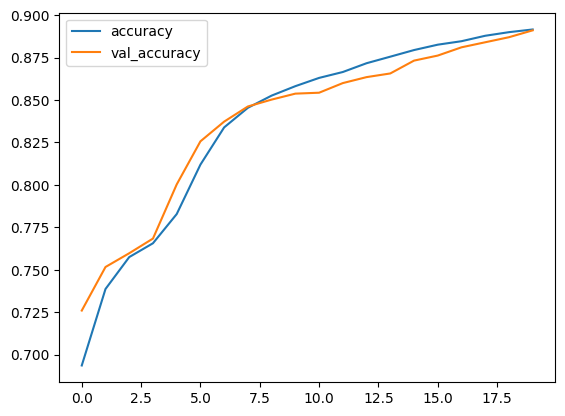

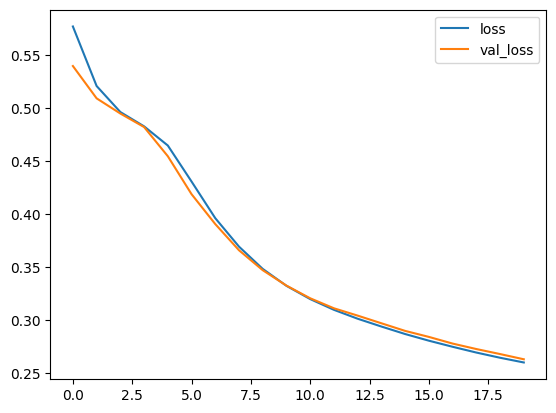

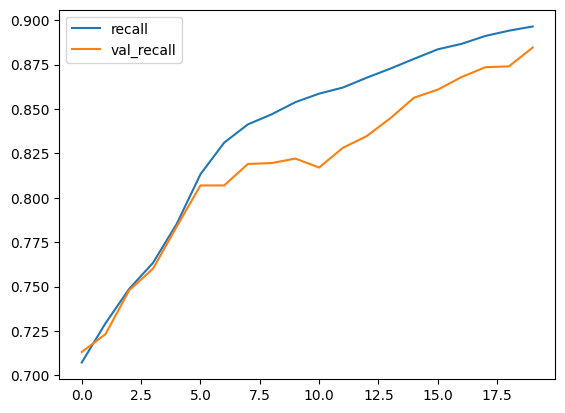

In [71]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()
history_seq_df[['recall', 'val_recall']].plot()

232/232 [==============================] - 0s 762us/step
Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      3362
           1       0.91      0.81      0.86      4037

    accuracy                           0.85      7399
   macro avg       0.85      0.86      0.85      7399
weighted avg       0.86      0.85      0.85      7399

Confusion Matrix      : 


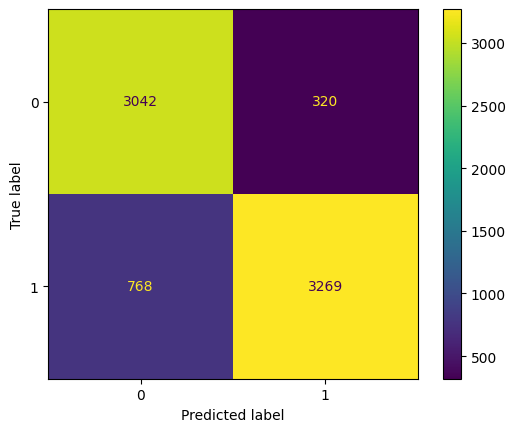

In [72]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print('Classification report : \n',classification_report(y_test, y_pred_func))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_func)).plot())
score_reports = {
    'Accuracy - Test': accuracy_score(y_test, y_pred_func) * 100,
    'Recall for Not Churn - Test': recall_score(y_test, y_pred_func, pos_label=0) * 100,
    'Recall for Churn - Test': recall_score(y_test, y_pred_func, pos_label=1) * 100,
    'Average of Recall - Test': (recall_score(y_test, y_pred_func, pos_label=0) * 100 + recall_score(y_test, y_pred_func, pos_label=1) * 100)/len(y_train.unique()),
}
all_report['Functional (Baseline)'] = score_reports

Dari hasil analisa model diatas, model sudah goodfit dalam metric loss dan accuracy. Namun model jika dilihat dari metrics recall, model sudah mulai memiliki peningkatan yang tidak begitu meningkat semenjak epoch ke 5. Oleh karena itu untuk improvementnya boleh dicoba menghapus hidden layer atau mengurangi neuron pada hidden layer

### Model Improvement

#### Model Definition

In [73]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [74]:
input_layer = Input(shape=(13,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional_improve = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_improve.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy','Recall'])
model_functional_improve.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 13)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   224       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 8)                    136       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 21)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

#### Model Training

In [75]:
# Train the Model

history_func = model_functional_improve.fit(train_pipe,
                                   epochs=20,
                                   validation_data=val_pipe)

Epoch 1/20


1036/1036 [==============================] - 2s 1ms/step - loss: 0.6727 - accuracy: 0.6661 - recall: 0.6949 - val_loss: 0.5404 - val_accuracy: 0.7270 - val_recall: 0.7308
Epoch 2/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.5223 - accuracy: 0.7455 - recall: 0.7663 - val_loss: 0.5184 - val_accuracy: 0.7430 - val_recall: 0.7389
Epoch 3/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.5056 - accuracy: 0.7562 - recall: 0.7757 - val_loss: 0.5020 - val_accuracy: 0.7514 - val_recall: 0.7409
Epoch 4/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4889 - accuracy: 0.7592 - recall: 0.7677 - val_loss: 0.4894 - val_accuracy: 0.7570 - val_recall: 0.7389
Epoch 5/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4811 - accuracy: 0.7638 - recall: 0.7706 - val_loss: 0.4830 - val_accuracy: 0.7635 - val_recall: 0.7500
Epoch 6/20
1036/1036 [==============================] - 1s 1ms/step - loss: 0.4761 - accuracy: 0.7684

#### Model Evaluation

In [76]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.577386,0.693585,0.707312,0.540004,0.725946,0.713206
1,0.521108,0.738655,0.729397,0.509458,0.751622,0.723286
2,0.496510,0.757463,0.748767,0.495100,0.759730,0.747984
3,0.482990,0.765612,0.763348,0.482337,0.768378,0.760081
4,0.464883,0.782798,0.785291,0.454758,0.800270,0.783770
5,0.430840,0.811957,0.813237,0.418889,0.825676,0.806956
6,0.396200,0.833893,0.831034,0.390616,0.837297,0.806956
7,0.369304,0.845441,0.841327,0.365867,0.846216,0.819052
8,0.348254,0.852624,0.846973,0.347042,0.850270,0.819556
9,0.332258,0.858186,0.853835,0.332474,0.853784,0.822077


<Axes: >

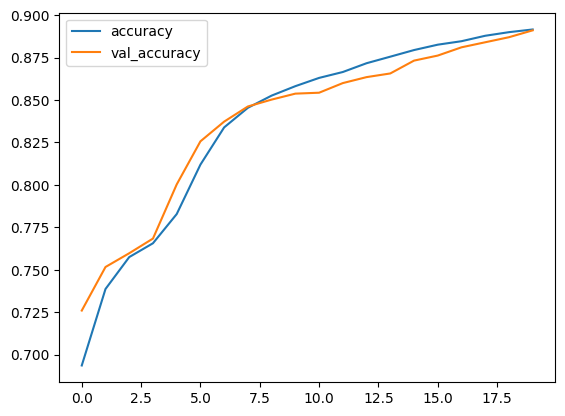

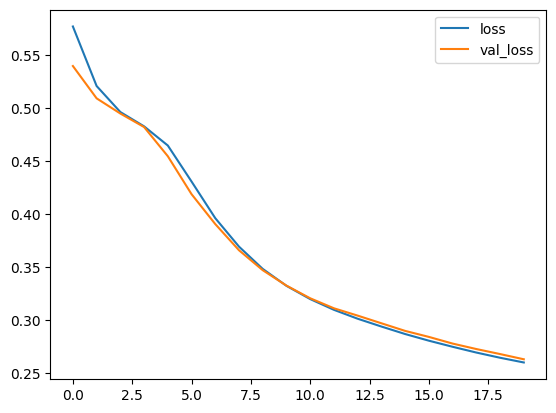

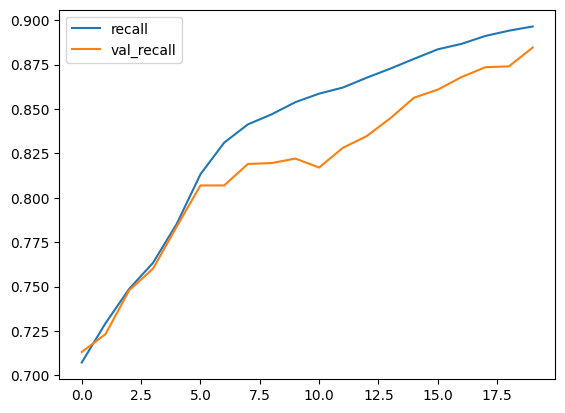

In [77]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()
history_seq_df[['recall', 'val_recall']].plot()

232/232 [==============================] - 0s 748us/step
Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      3362
           1       0.92      0.82      0.86      4037

    accuracy                           0.86      7399
   macro avg       0.86      0.87      0.86      7399
weighted avg       0.87      0.86      0.86      7399

Confusion Matrix      : 


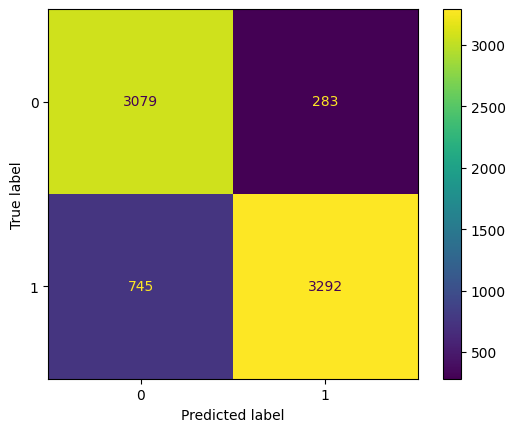

In [78]:
# Evaluate Test-Set

y_pred_func = model_functional_improve.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print('Classification report : \n',classification_report(y_test, y_pred_func))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_func)).plot())
score_reports = {
    'Accuracy - Test': accuracy_score(y_test, y_pred_func) * 100,
    'Recall for Not Churn - Test': recall_score(y_test, y_pred_func, pos_label=0) * 100,
    'Recall for Churn - Test': recall_score(y_test, y_pred_func, pos_label=1) * 100,
    'Average of Recall - Test': (recall_score(y_test, y_pred_func, pos_label=0) * 100 + recall_score(y_test, y_pred_func, pos_label=1) * 100)/len(y_train.unique()),
}
all_report['Functional (Tuned)'] = score_reports

In [79]:
pd.DataFrame(all_report)[['Functional (Baseline)','Functional (Tuned)']].T

,Accuracy - Test,Recall for Not Churn - Test,Recall for Churn - Test,Average of Recall - Test
Functional (Baseline),85.295310,90.481856,80.975972,85.728914
Functional (Tuned),86.106231,91.582391,81.545702,86.564047


Dari hasil improvement model Functional, model berhasil mengalami peningkatan rata-rata recall dari **85,72%** menjadi **86,56%**. Sehingga dapat dikatakan model berhasil ditingkatkan walaupun peningkatan tidak signifikan terlihat. Grafik recall model juga cenderung tidak naik terus menerus semenjak epoch ke 5 di data validation

## Compare Every Model

In [80]:
pd.DataFrame(all_report).T

,Accuracy - Test,Recall for Not Churn - Test,Recall for Churn - Test,Average of Recall - Test
Sequential (Baseline),85.538586,91.403926,80.653951,86.028939
Sequential (Tuned),89.714826,89.292088,90.066881,89.679485
Functional (Baseline),85.295310,90.481856,80.975972,85.728914
Functional (Tuned),86.106231,91.582391,81.545702,86.564047


Model Sequential baseline memiliki hasil recall yang lebih baik dibandingkan dengan model functional baseline dengan rata rata recall sebesar **86,02%** untuk model sequential dan **85,72%** untuk model functional. Meskipun perbedaan hasil evaluasi recallnya sangat sedikit pada model baseline, model sequential setelah diimprove memiliki rata - rata recall sebesar **89,67%** dimana model functional setelah di improve mendapatkan hasil **86,56%** atau memiliki selisih rata - rata recall **3,11%** dengan hasil model sequential yang lebih bagus dibandingkan model functional. Sehingga model sequential yang sudah di improve merupakan model dengan recall terbaik dengan rata-rata recall pada data test sebesar **89,67%**. Oleh karena itu model yang akan disimpan adalah model sequential yang sudah di improve

## Model Saving

In [81]:
# Save Preprocessor
with open('deployment/preprocessor.pkl', 'wb') as file_1:
  joblib.dump(preprocessor, file_1)

In [82]:
# Freeze Model

model_sequential_improve.trainable = False
model_sequential_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 369 (1.44 KB)
_________________________________________________________________


In [83]:
# Save ANN Model

model_sequential_improve.save('deployment/model_ann.h5')

c:\Users\Evaldo Raynardi\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Inference

Untuk model inference dapat di cek pada file `customer_churn_prediction.ipynb`

# Kesimpulan

Data terdiri dari 22 kolom yang dimana data yang memiliki keterkaitan dengan **churn_risk_score** ada 13 column yaitu data **avg_time_spent**, **avg_frequency_login_days**, **avg_transaction_value**, **point_in_wallet**, **membership_category**, **internet_option**, **used_special_discount**, **offer_application_preference**, **past_complaint**,
**complaint_status**, **feedback**, **preferred_offer_types**, **gender**. Kebanyakan customer yang churn memiliki **feedback yang negatif** kepada perusahaan dan cenderung **tidak memiliki membership ataupun member basic** saja. Selain itu customer yang churn cenderung memiliki **rata - rata transaksi** yang **rendah** dibandingkan dengan customer yang tidak churn.\
Dari 2 model Neural network yang dijalankan yaitu model Sequential dan model Functional. Model Sequential mendapatkan hasil recall yang lebih baik dibandingkan dengan model functional baseline dengan rata rata recall sebesar **86,02%** untuk model sequential dan **85,72%** untuk model functional. Setelah dilakukan improve, model sequential memiliki rata - rata recall sebesar **89,67%** dimana model functional setelah di improve mendapatkan hasil **86,56%** atau memiliki selisih rata - rata recall **3,11%** dengan hasil model sequential yang lebih bagus dibandingkan model functional. Sehingga model sequential yang sudah di improve merupakan model dengan recall terbaik dengan rata-rata recall pada data test sebesar **89,67%**. Model Sequential yang sudah di improve merupakan model yang good fit dikarenakan loss pada data train dan data validation di model sequential yang sudah diimprove memiliki selisih yang tidak jauh \
Untuk improvement kedepannya, dapat dimulai dengan mencoba menggunakan model machine learning dibandingkan dengan model Neural Network. Hal tersebut dikarenakan datanya belum begitu banyak dan dengan adanya feature engineering, machine learning memiliki potensi untuk mampu melihat pola dari customer yang churn ataupun tidak. Selain itu, apabila ingin menggunakan model Neural Network cobalah untuk membangun model yang lebih sederhana, karena meskipun model goodfit pada nilai loss, model dapat dikatakan overfit pada metrics recall dimana recall pada data train cenderung meningkat sedangkan recall pada data validation cenderung stagnant dan tidak ada peningkatan lagi.